# Multiple Variable Linear Regression

In this assignment, you will get familiar with vector operations, and extend the data structures and previously developed routines to support multiple features. Several routines are updated making the assignment appear lengthy, but it makes minor adjustments to previous routines making it quick to review.

## Goals
    - Play with vector operations
    - Extend our regression model routines to support multiple features
    - Extend data structures to support multiple features
    - Rewrite prediction, cost and gradient routines to support multiple features
    - Utilize NumPy `np.dot` to vectorize their implementations for speed and simplicity
    - Play with learning rate and feature scaling

## Tools
In this assignment, we will make use of: 
- NumPy, a popular library for scientific computing
- Matplotlib, a popular library for plotting data

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Vector Operations

## 1.1 Single vector operations

There are a number of useful operations that involve operations on a single vector.

In [2]:
a = np.array([1,2,3,4])
print(f"a             : {a}")
# negate elements of a
b = -a 
print(f"b = -a        : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a) 
print(f"b = np.sum(a) : {b}")

b = np.mean(a)
print(f"b = np.mean(a): {b}")

b = a**2
print(f"b = a**2      : {b}")

a             : [1 2 3 4]
b = -a        : [-1 -2 -3 -4]
b = np.sum(a) : 10
b = np.mean(a): 2.5
b = a**2      : [ 1  4  9 16]


## 1.2 Vector Vector element-wise operations
Most of the NumPy arithmetic, logical and comparison operations apply to vectors as well. These operators work on an element-by-element basis. For example 
$$ c_i = a_i + b_i $$

In [3]:
a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Binary operators work element wise: [0 0 6 8]


Of course, for this to work correctly, the vectors must be of the same size:

In [4]:
#try a mismatched vector operation
c = np.array([1, 2])
try:
    d = a + c
except Exception as e:
    print("The error message you'll see is:")
    print(e)

The error message you'll see is:
operands could not be broadcast together with shapes (4,) (2,) 


## 1.3 Scalar Vector operations
Vectors can be 'scaled' by scalar values. A scalar value is just a number. The scalar multiplies all the elements of the vector.

In [5]:
a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a 
print(f"b = 5 * a : {b}")

b = 5 * a : [ 5 10 15 20]


## 1.4 Vector-Vector dot product
The dot product is a mainstay of Linear Algebra and NumPy. This is an operation used extensively in this course and should be well understood. The dot product multiplies the values in two vectors element-wise and then sums the result.
Vector dot product requires the dimensions of the two vectors to be the same. 

Let's implement our own version of the dot product below:

**Using a for loop**, implement a function which returns the dot product of two vectors. The function to return given inputs $a$ and $b$:
$$ x = \sum_{i=0}^{n-1} a_i b_i $$
Assume both `a` and `b` are the same shape.

In [6]:
def my_dot(a, b): 
    """
   Compute the dot product of two vectors
 
    Args:
      a (ndarray (n,)):  input vector 
      b (ndarray (n,)):  input vector with same dimension as a
    
    Returns:
      x (scalar): 
    """
    # Write a for loop to implement dot product
    x=sum([a[i]*b[i] for i in range(len(a))])
    return x

In [7]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
print(f"my_dot(a, b) = {my_dot(a, b)}")

my_dot(a, b) = 24


Note, the above dot product is expected to return a scalar value of 24. 

Let's try the same operations using `np.dot`.  

In [9]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)                   # use np.dot to implement dot product
print(f"NumPy 1-D np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ") 


NumPy 1-D np.dot(a, b) = 24, np.dot(a, b).shape = () 


Above, you will note that the result for 1-D matched our own implementation.

## 1.5 The Need for Speed: vector vs for loop
We utilized the NumPy library because it improves speed memory efficiency. Let's demonstrate:

In [10]:
np.random.seed(1)
a = np.random.rand(10000000)  # very large arrays
b = np.random.rand(10000000)

tic = time.time()  # capture start time
c = np.dot(a, b)
toc = time.time()  # capture end time

print(f"np.dot(a, b) =  {c:.4f}")
print(f"Vectorized version duration: {1000*(toc-tic):.4f} ms ")

tic = time.time()  # capture start time
c = my_dot(a,b)
toc = time.time()  # capture end time

print(f"my_dot(a, b) =  {c:.4f}")
print(f"loop version duration: {1000*(toc-tic):.4f} ms ")

del(a);del(b)  #remove these big arrays from memory

np.dot(a, b) =  2501072.5817
Vectorized version duration: 16.0971 ms 
my_dot(a, b) =  2501072.5817
loop version duration: 4157.5334 ms 


So, vectorization provides a large speed up in this example. This is because NumPy makes better use of available data parallelism in the underlying hardware. GPU's and modern CPU's implement Single Instruction, Multiple Data (SIMD) pipelines allowing multiple operations to be issued in parallel. This is critical in Machine Learning where the data sets are often very large.

## 1.6 Vector-Vector operations in this course
Vector-Vector operations will appear frequently in this course. Here is why:
- Going forward, our examples will be stored in an array, `X_train` of dimension (m,n). This will be explained more in context, but here it is important to note it is a 2 Dimensional array or matrix.
- `w` will be a 1-dimensional vector of shape (n,).
- we will perform operations by looping through the examples, extracting each example to work on individually by indexing X. For example:`X[i]`
- `X[i]` returns a value of shape (n,), a 1-dimensional vector. Consequently, operations involving `X[i]` are often vector-vector.  

Please note that aligning and understanding the shapes of your operands is important when performing vector operations.

In [11]:
# show common example
X = np.array([[1],[2],[3],[4]])
w = np.array([2])
c = np.dot(X[1], w)

print(f"X[1] has shape {X[1].shape}")
print(f"w has shape {w.shape}")
print(f"c has shape {c.shape}")

X[1] has shape (1,)
w has shape (1,)
c has shape ()


# 2. Multiple Variable Linear Regression


## 2.1 Notation
Here is a summary of some of the notation you will encounter, updated for multiple features.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                 ||
| $\mathbf{A}$ | matrix, bold capital                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | training example maxtrix                  | `X_train` |   
|  $\mathbf{y}$  | training example  targets                | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m`|
| n | number of features in each example | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | The result of the model evaluation at $\mathbf{x^{(i)}}$ parameterized by $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 



## 2.2 Problem Statement

You will use the motivating example of diabetes progression prediction. The training dataset contains three examples with four features shown in the table below. 

| Age             | BMI                 | BP               | S1           | Diabetes progression |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 59              | 32.1                | 101              | 157          | 151           |  
| 48              | 21.6                | 81               | 183          | 75            |  
| 72              | 20.5                | 93               | 156          | 141           |  

You will build a linear regression model using these values so you can then predict the diabetes progression for other patients. 

Please run the following code cell to create your `X_train` and `y_train` variables.

In [12]:
X_train = np.array([[59, 32.1, 101, 157], [48, 21.6, 87, 183], [72, 30.5, 93, 156]])
y_train = np.array([151, 75, 141])


### 1) Matrix X containing our examples
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.  

Display the input data.

In [13]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[ 59.   32.1 101.  157. ]
 [ 48.   21.6  87.  183. ]
 [ 72.   30.5  93.  156. ]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[151  75 141]



### 2) Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

For demonstration, $\mathbf{w}$ and $b$ will be loaded with some initial selected values that are near the optimal. $\mathbf{w}$ is a 1-D NumPy vector.

In [14]:
b_init = 0.01
w_init = np.array([0.8468114, 1.1005659, 2.0638614, -0.92181416])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (4,), b_init type: <class 'float'>



## 2.3 Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).


### 1) Single Prediction element by element
Our previous prediction multiplied one feature value by one parameter and added a bias parameter. A direct extension of our previous implementation of prediction to multiple features would be to implement (1) above using loop over each element, performing the multiply with its parameter and then adding the bias parameter at the end.


In [15]:
def predict_single_loop(x, w, b): 
    """
    single predict using linear regression
    
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters    
      b (scalar):  model parameter     
      
    Returns:
      p (scalar):  prediction
    """
    n = x.shape[0]
    
    # write a loop to implenment equation (1)
    p = sum([np.dot(w[i], x[i]) for i in range(n)]) + b             
    return p

In [17]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)

print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [ 59.   32.1 101.  157. ]
f_wb shape (), prediction: 149.02521627


Note the shape of `x_vec`. It is a 1-D NumPy vector with 4 elements, (4,). The result, `f_wb` is a scalar. The expected prediction value is 149.02521627


### 2) Single Prediction, vector

Noting that equation (1) above can be implemented using the dot product as in (2) above. We can make use of vector operations to speed up predictions.

Recall from the Python/Numpy lab that NumPy `np.dot()`[[link](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)] can be used to perform a vector dot product. 

In [20]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b                   # Write code to implenment equation (2) using np.dot()
    return p    

In [21]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [ 59.   32.1 101.  157. ]
f_wb shape (), prediction: 149.02521627


The results and shapes are the same as the previous version which used looping. Going forward, `np.dot` will be used for these operations. The prediction is now a single statement. Most routines will implement it directly rather than calling a separate predict routine.


## 2.4 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous assignments, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

Below is an implementation of equations (3) and (4). Note that this uses a *standard pattern for this course* where a for loop over all `m` examples is used.

In [33]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    # write a loop to implement equations (3) and (4) 
    cost = sum([(predict(X[i], w, b) -  y[i])**2 for i in range(m)]) / (2 * m)                      #scalar    
    return cost

In [34]:
# Compute and display cost using our pre-chosen optimal parameters. 
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.1368020974268127


**Expected Result**: Cost at optimal w : 1.136802097426778


## 2.5 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value



### 1) Compute Gradient with Multiple Variables
Finish the implementation for calculating the equations (6) and (7) is below. There are many ways to implement this. In this version, there is an
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.
   

In [35]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.
    
    # write the nested loop to compute the summation for dj_dw and dj_db
    dj_dw = sum([(predict(X[i], w, b) -  y[i])*X[i] for i in range(m)])
    dj_db = sum([(predict(X[i], w, b) -  y[i]) for i in range(m)])
    
    
    
    
    
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [36]:
#Compute and display gradient 
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 0.0007064733333332166
dj_dw at initial w,b: 
 [ 6.26329296 -1.90126333 -5.78663025  2.09003904]


**Expected Result**:   

dj_db at initial w,b: 0.0007064733333332166 

dj_dw at initial w,b:   
 [ 6.26329296 -1.90126333 -5.78663025  2.09003904] 

<a name="toc_15456_5.2"></a>
## 5.2 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [37]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b) 

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha*dj_dw              
        b = b - alpha*dj_db              
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In the next cell you will test the implementation. 

In [38]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 1.0e-6
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost  7465.64   
Iteration 1000: Cost   424.16   
Iteration 2000: Cost   270.85   
Iteration 3000: Cost   176.36   
Iteration 4000: Cost   117.88   
Iteration 5000: Cost    81.44   
Iteration 6000: Cost    58.54   
Iteration 7000: Cost    43.94   
Iteration 8000: Cost    34.46   
Iteration 9000: Cost    28.15   
b,w found by gradient descent: 0.01,[ 1.2539105   0.86230737  1.44845846 -0.68013895] 
prediction: 141.18, target value: 151
prediction: 80.37, target value: 75
prediction: 145.19, target value: 141


**Expected Result**:    

b,w found by gradient descent: 0.01,[ 1.2539105   0.86230737  1.44845846 -0.68013895] 

prediction: 141.18, target value: 151

prediction: 80.37, target value: 75

prediction: 145.19, target value: 141

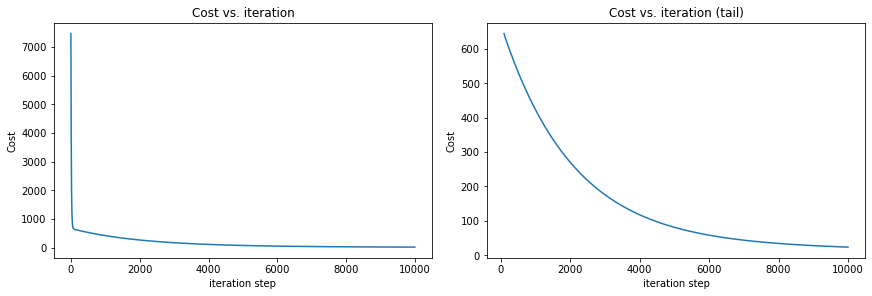

In [39]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

# 3. Learning Rate and Feature Scaling

## 3.1 Learning Rate

The lectures discussed some of the issues related to setting the learning rate $\alpha$. The learning rate controls the size of the update to the parameters. See equation (5) above. It is shared by all the parameters.  

Let's run gradient descent and try a few settings of $\alpha$ on a more realistic data set with 442 training examples.

Numpy has a method called "loadtxt()" that can be used to load data from a text file shown below.

In [40]:
def load_diabetes_data():
    data = np.loadtxt("./data/Diabetes.txt", skiprows=1)
    X = data[:,:4]
    y = data[:,4]

    return X, y

In [41]:
# load the dataset
X_train, y_train = load_diabetes_data()
print(f"Total number of training examples m = {X_train.shape[0]}") 
X_features = ['Age','BMI','Bp','S1']

Total number of training examples m = 442


In [42]:
#set alpha to 5.0e-5
iterations = 10
alpha = 5.0e-5
_, _, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost 27366.40   
Iteration    1: Cost 54125.64   
Iteration    2: Cost 109928.82   
Iteration    3: Cost 226288.35   
Iteration    4: Cost 468907.71   
Iteration    5: Cost 974778.74   
Iteration    6: Cost 2029529.76   
Iteration    7: Cost 4228696.31   
Iteration    8: Cost 8813971.20   
Iteration    9: Cost 18374286.28   


It appears the learning rate is too high. The solution does not converge. Cost is increasing rather than decreasing. Let's plot the result:

In [43]:
def plot_cost_versus_iteration(hist):
    plt.plot(J_hist, c='b',label='Cost')
    plt.title("Cost vs. iteration"); 
    plt.ylabel('Cost')             ;  
    plt.xlabel('iteration step')   ;  
    plt.show()

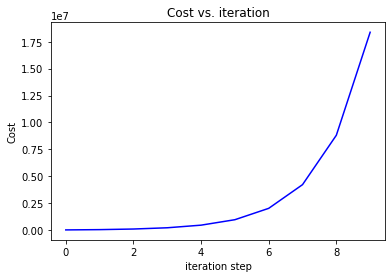

In [44]:
plot_cost_versus_iteration(J_hist)

Let's try a bit smaller value and see what happens.

In [45]:
#set alpha to 1.0e-6
iterations = 10
alpha = 1.0e-6
_, _, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost 13408.58   
Iteration    1: Cost 12387.54   
Iteration    2: Cost 11463.86   
Iteration    3: Cost 10628.25   
Iteration    4: Cost  9872.31   
Iteration    5: Cost  9188.45   
Iteration    6: Cost  8569.79   
Iteration    7: Cost  8010.12   
Iteration    8: Cost  7503.80   
Iteration    9: Cost  7045.75   


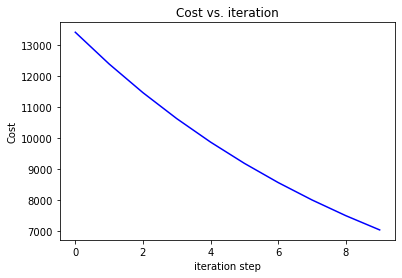

In [46]:
plot_cost_versus_iteration(J_hist)

Cost is decreasing throughout the run showing that alpha is not too large. However, the cost is not decreasing very fast. Let's try a bit bigger value for $\alpha$ and see what happens.

In [47]:
#set alpha to 5.0e-6
iterations = 10
alpha = 5.0e-6
_, _, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

Iteration    0: Cost  9459.34   
Iteration    1: Cost  6559.77   
Iteration    2: Cost  4903.90   
Iteration    3: Cost  3958.10   
Iteration    4: Cost  3417.71   
Iteration    5: Cost  3108.78   
Iteration    6: Cost  2932.01   
Iteration    7: Cost  2830.69   
Iteration    8: Cost  2772.45   
Iteration    9: Cost  2738.80   


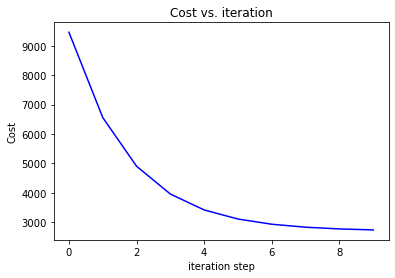

In [48]:
plot_cost_versus_iteration(J_hist)

This $\alpha$ looks a little bit better as the cost decreases faster ant its value is smaller after 10 iterations.

## 3.1 Feature Scaling
The lectures described the importance of rescaling the dataset so the features have a similar range. The section below will walk through an implementation of how to do feature scaling.

The lectures discussed three different techniques: 
- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $ 
- Z-score normalization which we will explore below. 

### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the diabetes progression we have not
seen before. Given a new x value, we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

In [49]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

Let's look at the steps involved in Z-score normalization. The plot below shows the transformation step by step.

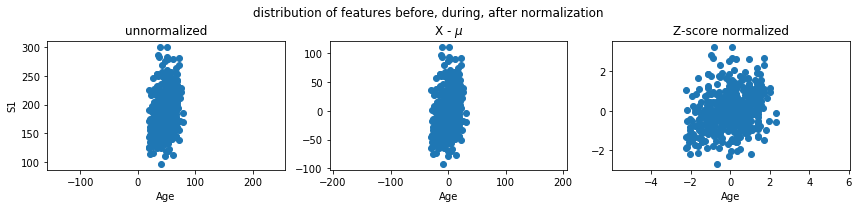

In [50]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()

The plot above shows the relationship between two of the training set parameters, "S1" and "Age". *These are plotted with equal scale*. 
- Left: Unnormalized: The range of values or the variance of the 'S1' feature is larger than that of age
- Middle: The first step removes the mean or average value from each feature. This leaves features that are centered around zero. It's difficult to see the difference for the 'S1' feature, but 'Age' is clearly around zero.
- Right: The second step divides by the standard deviation. This leaves both features centered at zero with a similar scale.

Let's normalize the data and compare it to the original data.

In [52]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [ 48.51809955  26.37579186  94.64701357 189.14027149], 
X_sigma = [13.09419021  4.41312086 13.81562831 34.56888013]
Peak to Peak range by column in Raw        X:[ 60.   24.2  71.  204. ]
Peak to Peak range by column in Normalized X:[4.58218485 5.48364769 5.13910757 5.90126146]
